# Alucel - Análise de Vendas

In [3]:
import pandas as pd
import seaborn as sns
alucel = pd.read_csv('alucel.csv')
alucel['dia'] = pd.to_datetime(alucel['dia'])
alucel.head()

,dia,vendas
0,2018-10-01,1374.83
1,2018-10-02,2185.69
2,2018-10-03,1860.36
3,2018-10-04,1939.02
4,2018-10-05,1946.17


In [4]:
print('Quantidade de linhas e colunas: ', alucel.shape)
print('Quantidade de dados nulos: ', alucel.isna().sum().sum())

Quantidade de linhas e colunas:  (61, 2)
Quantidade de dados nulos:  0


In [5]:
alucel['aumento'] = alucel['vendas'].diff()
alucel['aceleracao'] = alucel['aumento'].diff()
alucel.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,1374.83,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN
2,2018-10-03,1860.36,-325.33,-1136.19
3,2018-10-04,1939.02,78.66,403.99
4,2018-10-05,1946.17,7.15,-71.51


In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('Accent')
sns.set_style('darkgrid')

def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo, fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)

C:\Users\Saulo\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


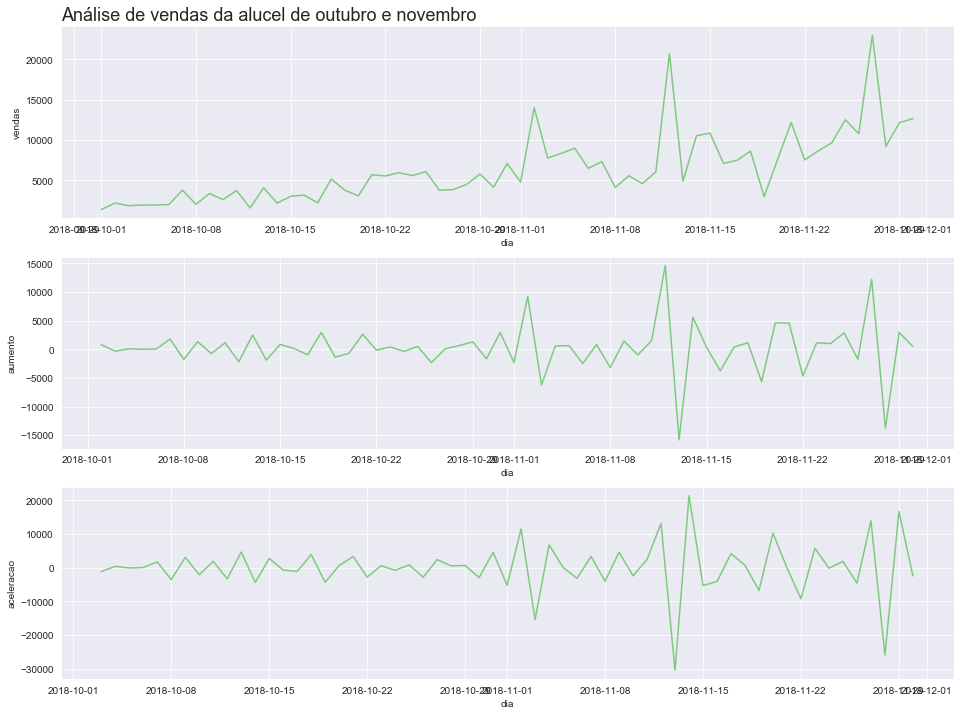

In [7]:
plot_comparacao('dia', 'vendas', 'aumento', 'aceleracao', alucel, 'Análise de vendas da alucel de outubro e novembro')

## Média móvel  

Novamente, não explicou exatamente o que é a média móvel....

In [9]:
alucel['media_movel'] = alucel['vendas'].rolling(7).mean()
alucel.head(7)

,dia,vendas,aumento,aceleracao,media_movel
0,2018-10-01,1374.83,NaN,NaN,NaN
1,2018-10-02,2185.69,810.86,NaN,NaN
2,2018-10-03,1860.36,-325.33,-1136.19,NaN
3,2018-10-04,1939.02,78.66,403.99,NaN
4,2018-10-05,1946.17,7.15,-71.51,NaN
5,2018-10-06,2005.89,59.72,52.57,NaN
6,2018-10-07,3793.07,1787.18,1727.46,2157.861429


In [11]:
def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax = ax

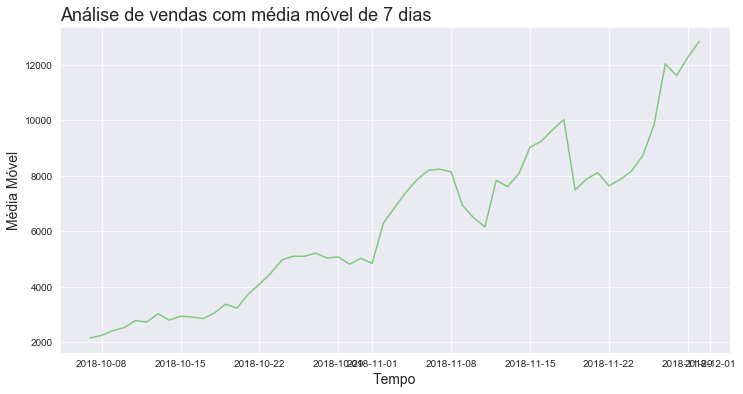

In [12]:
plotar('Análise de vendas com média móvel de 7 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel', alucel)

In [13]:
alucel['media_movel_21'] = alucel['vendas'].rolling(21).mean()

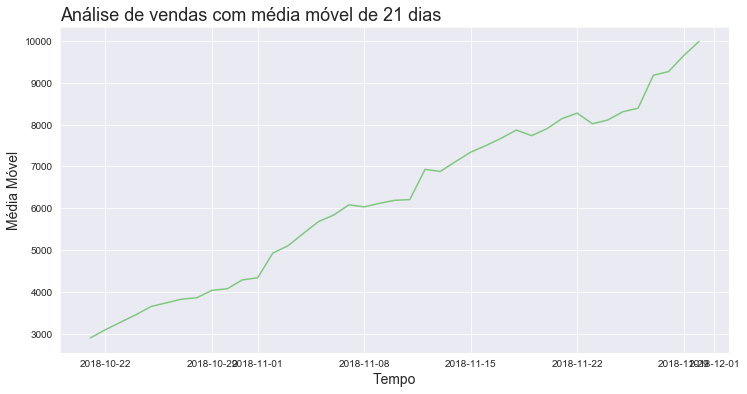

In [14]:
plotar('Análise de vendas com média móvel de 21 dias', 'Tempo', 'Média Móvel', 'dia', 'media_movel_21', alucel)

Mas o que significa??? Porque isso é mais interessante???